In [1]:
#LOAD PACKAGE
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# SEC.1 Load and clean data

In [2]:
#Load Data
dataGAP = pd.read_csv("GAP_baseline_20190404-Final.csv")
dataCOACH = pd.read_csv("COACH_baseline_20190404.csv")

In [3]:
# See how many common column in both data set
commonList = []
for each in list(dataCOACH.columns):
    for i in list(dataGAP.columns):
        if each == i:
            commonList.append(i)
print("The number of common column :" , len(commonList))

The number of common column : 77


In [4]:
# Select common column to dataCG
dataGAP = dataGAP [['Assessment','Grade','Marital','Live','LiveOther1','LiveOther2','Health',
 'Employment','EmploymentOther','Driving','Age','Feel','ZipCode','Gender','Ethnicity','Race',
 'Insurance','InsuranceOther','Income','Living','Services','Hospital','HospitalCost','NursingHome',
 'NursingHomeCost','Visits','VisitsCost','Sx','SxCost','Dental','DentalCost','Meds','MedsCost',
 'HomeCare','HomeCareCost','Rehab','RehabCost','Meals','MealsCost','Transport','TransportCost',
 'OtherExpDesc','OtherExp','OtherExpCost','Help','HelpWho','HelpAmount','DelayMed','IncomeAvail',
 'Enough','FH1','FH1aMonths','FH1aDays','FH1bTimesFallen','FH1b','FH1c','FH2','FH3','KPS',
 'ImpairedPolypharmacy','ImpairedBOMC','ImpairedMiniCog','ImpairedWeight','ImpairedBMI','ImpairedMNA',
 'ImpairedTUG','ImpairedSPPB','ImpairedADL','ImpairedIADL','ImpairedPH','ImpairedFalls','ImpairedCom',
 'ImpairedGAD7','ImpairedGDS','ImpairedMS','cancertype','id']]
dataCOACH = dataCOACH[['Assessment','Grade','Marital','Live','LiveOther1','LiveOther2','Health',
 'Employment','EmploymentOther','Driving','Age','Feel','ZipCode','Gender','Ethnicity','Race',
 'Insurance','InsuranceOther','Income','Living','Services','Hospital','HospitalCost','NursingHome',
 'NursingHomeCost','Visits','VisitsCost','Sx','SxCost','Dental','DentalCost','Meds','MedsCost',
 'HomeCare','HomeCareCost','Rehab','RehabCost','Meals','MealsCost','Transport','TransportCost',
 'OtherExpDesc','OtherExp','OtherExpCost','Help','HelpWho','HelpAmount','DelayMed','IncomeAvail',
 'Enough','FH1','FH1aMonths','FH1aDays','FH1bTimesFallen','FH1b','FH1c','FH2','FH3','KPS',
 'ImpairedPolypharmacy','ImpairedBOMC','ImpairedMiniCog','ImpairedWeight','ImpairedBMI','ImpairedMNA',
 'ImpairedTUG','ImpairedSPPB','ImpairedADL','ImpairedIADL','ImpairedPH','ImpairedFalls','ImpairedCom',
 'ImpairedGAD7','ImpairedGDS','ImpairedMS','cancertype','id']]
dataCG = pd.concat([dataGAP,dataCOACH])

# Show common column names

print("The common columns are :", dataCG.columns)

The common columns are : Index(['Assessment', 'Grade', 'Marital', 'Live', 'LiveOther1', 'LiveOther2',
       'Health', 'Employment', 'EmploymentOther', 'Driving', 'Age', 'Feel',
       'ZipCode', 'Gender', 'Ethnicity', 'Race', 'Insurance', 'InsuranceOther',
       'Income', 'Living', 'Services', 'Hospital', 'HospitalCost',
       'NursingHome', 'NursingHomeCost', 'Visits', 'VisitsCost', 'Sx',
       'SxCost', 'Dental', 'DentalCost', 'Meds', 'MedsCost', 'HomeCare',
       'HomeCareCost', 'Rehab', 'RehabCost', 'Meals', 'MealsCost', 'Transport',
       'TransportCost', 'OtherExpDesc', 'OtherExp', 'OtherExpCost', 'Help',
       'HelpWho', 'HelpAmount', 'DelayMed', 'IncomeAvail', 'Enough', 'FH1',
       'FH1aMonths', 'FH1aDays', 'FH1bTimesFallen', 'FH1b', 'FH1c', 'FH2',
       'FH3', 'KPS', 'ImpairedPolypharmacy', 'ImpairedBOMC', 'ImpairedMiniCog',
       'ImpairedWeight', 'ImpairedBMI', 'ImpairedMNA', 'ImpairedTUG',
       'ImpairedSPPB', 'ImpairedADL', 'ImpairedIADL', 'ImpairedPH',
      

0    571
1    187
Name: ImpairedFalls, dtype: int64


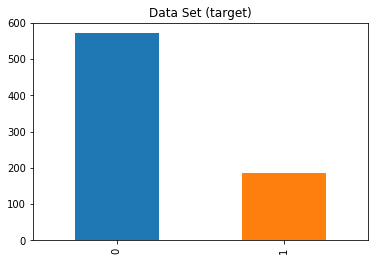

In [5]:
# Show common column names and count of calsses in each class

print(dataCG["ImpairedFalls"].value_counts())
dataCG["ImpairedFalls"].value_counts().plot(kind='bar', title='Data Set (target)');

In [6]:
## feacture With less than 15 missing value
df_fecture = dataCG.isnull().sum()
df_fecture = df_fecture.where(df_fecture<15)
df_fecture = df_fecture.dropna()
fecturelist = list(df_fecture.index)
df_fecture.index

Index(['Assessment', 'Grade', 'Marital', 'Live', 'Health', 'Employment',
       'Driving', 'Age', 'Feel', 'Gender', 'Ethnicity', 'Race', 'Insurance',
       'Income', 'Living', 'FH1', 'FH2', 'FH3', 'KPS', 'ImpairedPolypharmacy',
       'ImpairedBOMC', 'ImpairedMiniCog', 'ImpairedWeight', 'ImpairedBMI',
       'ImpairedMNA', 'ImpairedTUG', 'ImpairedSPPB', 'ImpairedADL',
       'ImpairedIADL', 'ImpairedPH', 'ImpairedFalls', 'ImpairedCom',
       'ImpairedGAD7', 'ImpairedGDS', 'ImpairedMS', 'cancertype', 'id'],
      dtype='object')

In [7]:
## fecture with less than 15 missing value (without id)

dataCG = dataCG[['Grade', 'Marital', 'Live', 'Health', 'Employment',
       'Driving', 'Age', 'Feel', 'Gender', 'Ethnicity', 'Race', 'Insurance',
       'Income', 'Living', 'FH1', 'FH2', 'FH3', 'KPS', 'ImpairedPolypharmacy',
       'ImpairedBOMC', 'ImpairedMiniCog', 'ImpairedWeight', 'ImpairedBMI',
       'ImpairedMNA', 'ImpairedTUG', 'ImpairedSPPB', 'ImpairedADL',
       'ImpairedIADL', 'ImpairedPH', 'ImpairedFalls', 'ImpairedCom',
       'ImpairedGAD7', 'ImpairedGDS', 'ImpairedMS', 'cancertype']]
dataCG.describe()

,Grade,Marital,Health,Driving,Age,Feel,Gender,Ethnicity,Income,Living,...,ImpairedTUG,ImpairedSPPB,ImpairedADL,ImpairedIADL,ImpairedPH,ImpairedFalls,ImpairedCom,ImpairedGAD7,ImpairedGDS,ImpairedMS
count,756.000000,756.000000,753.000000,756.000000,756.000000,746.000000,756.000000,756.000000,754.000000,755.000000,...,757.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,5.309524,3.142857,3.120850,0.776455,76.763228,69.424933,1.484127,2.007937,3.343501,1.615894,...,0.393659,0.803430,0.278364,0.558047,0.755937,0.246702,0.647757,0.105541,0.234828,0.284960
std,2.333054,1.608163,1.035284,0.416896,5.377241,13.923487,0.500079,0.281793,1.257135,0.637686,...,0.488884,0.397667,0.448490,0.496947,0.429814,0.431376,0.477985,0.307452,0.424171,0.451694
min,1.000000,1.000000,1.000000,0.000000,70.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,72.000000,61.250000,1.000000,2.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2.000000,3.000000,1.000000,76.000000,70.000000,1.000000,2.000000,3.000000,2.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,4.000000,1.000000,80.000000,76.000000,2.000000,2.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,8.000000,6.000000,5.000000,1.000000,96.000000,175.000000,2.000000,9.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


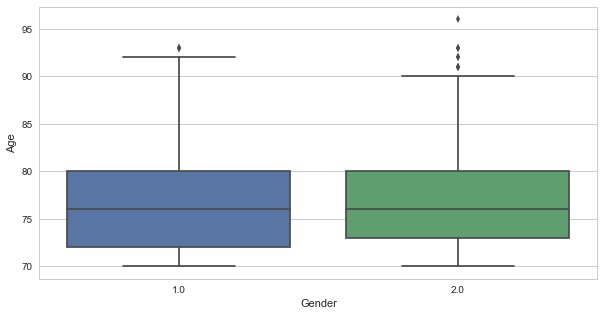

In [8]:
## The data overview on geneder and age

import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
b = dataCG[["Age","Gender"]]
ax = sns.boxplot(x="Gender", y="Age",data=b)

In [9]:
dataCG._get_numeric_data().columns ##Feacture with numeric value

Index(['Grade', 'Marital', 'Health', 'Driving', 'Age', 'Feel', 'Gender',
       'Ethnicity', 'Income', 'Living', 'FH1', 'FH2', 'FH3', 'KPS',
       'ImpairedPolypharmacy', 'ImpairedBOMC', 'ImpairedMiniCog',
       'ImpairedWeight', 'ImpairedBMI', 'ImpairedMNA', 'ImpairedTUG',
       'ImpairedSPPB', 'ImpairedADL', 'ImpairedIADL', 'ImpairedPH',
       'ImpairedFalls', 'ImpairedCom', 'ImpairedGAD7', 'ImpairedGDS',
       'ImpairedMS'],
      dtype='object')

In [10]:
list(set(dataCG.columns) - set(dataCG._get_numeric_data().columns)) ##Feacture not in numeric value

['Race', 'Live', 'Insurance', 'Employment', 'cancertype']

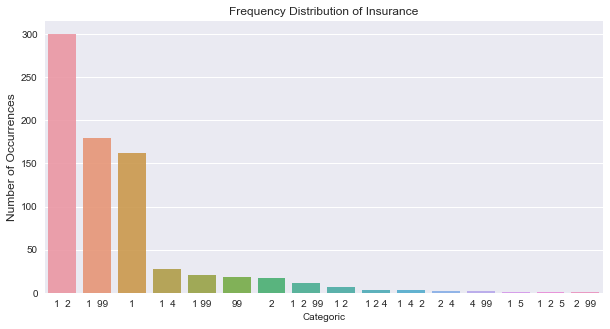

In [11]:
# Bar chart for Insurance before group by map
import seaborn as sns
import matplotlib.pyplot as plt
Insurance = dataCG["Insurance"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

sns.barplot(Insurance.index, Insurance.values, alpha=0.9)
plt.title('Frequency Distribution of Insurance')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Categoric', fontsize=10)
plt.show()

In [12]:
# Reference for mapping "1  2" as 1 in new column , other will be fill with 0
Insurance_replace_map = {"1  2": 1, "1  99": 2, '1': 3, "1  4": 4,"1 99": 5} #other : 0
showOff = dataCG['Insurance'].map(Insurance_replace_map).fillna(0)

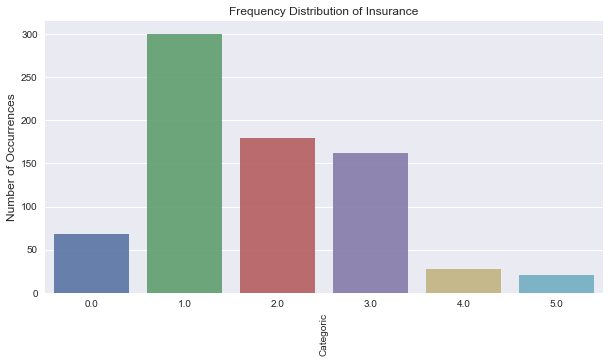

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Insurance = showOff.value_counts()
plt.figure(figsize=(10, 5))

sns.set(style="darkgrid")
sns.barplot(Insurance.index, Insurance.values, alpha=0.9)
plt.title('Frequency Distribution of Insurance')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Categoric', fontsize=10,rotation=90)
plt.show()

In [14]:
# cut categrocial data into classes
dataCG["Age"] = pd.cut(dataCG["Age"], range(69, 100, 5))
dataCG["Feel"] = pd.cut(dataCG["Feel"],range(0,180,30))
dataCG["KPS"] = pd.cut(dataCG["KPS"],range(19,100,20))

In [15]:
## All other the mapping reference
Insurance_replace_map = {"1  2": 1, "1  99": 2, '1': 3, "1  4": 4,"1 99": 5} #other : 0
Live_replace_map = {"1": 1, "3": 2, '1  5': 3, "992": 4,"991": 5} #other : 0
cancertype_replace_map = {"GI":1,"Lung":2,"GU":3,"Breast":4,"Lymphoma":5,"Other":6,"Gyne":7}
race_replace_map = {"1":1,"2":2,'4':3}

## Numerical value to categorical value mapping
age_replace_map = {"range(69, 74]":1,"(74, 79]":2,"(79, 84]":3,"(84, 89]":4,"(89, 94]":5,"(94, 99]":6}

In [16]:
# a new data frame will remove Employment
dataCG_cleaned = dataCG.drop(['Employment','FH1'], axis=1)

# preforme all the mapping
dataCG_cleaned["Race"] = dataCG['Race'].map(race_replace_map).fillna(0)
dataCG_cleaned["cancertype"] = dataCG['cancertype'].map(cancertype_replace_map) ## not fillnan 2 missing and other is option
dataCG_cleaned["Insurance"] = dataCG['Insurance'].map(Insurance_replace_map).fillna(0)
dataCG_cleaned["Live"] = dataCG['Live'].map(Live_replace_map).fillna(0)

dataCG_cleaned["Age"] = dataCG['Age'].cat.codes
dataCG_cleaned["Feel"] = dataCG['Feel'].cat.codes
dataCG_cleaned["KPS"] = dataCG['KPS'].cat.codes


In [17]:
#Show value with more than 2 missing and use mean or median to subsitude
dataCG_cleaned.isnull().sum().where(dataCG_cleaned.isnull().sum()>2).dropna()

Health    5.0
Income    4.0
Living    3.0
FH2       6.0
FH3       4.0
dtype: float64

In [18]:
# Fill up nan value with median and mean
dataCG_cleaned["Health"] = dataCG_cleaned["Health"].fillna(dataCG_cleaned["Health"].median())
dataCG_cleaned["Feel"] = dataCG_cleaned["Feel"].fillna(dataCG_cleaned["Feel"].mean())
dataCG_cleaned["Income"] = dataCG_cleaned["Income"].fillna(dataCG_cleaned["Income"].median())
dataCG_cleaned["Living"] = dataCG_cleaned["Living"].fillna(dataCG_cleaned["Living"].median())
dataCG_cleaned["FH2"] = dataCG_cleaned["FH2"].fillna(dataCG_cleaned["FH2"].median())
dataCG_cleaned["FH3"] = dataCG_cleaned["FH3"].fillna(dataCG_cleaned["FH3"].median())

In [19]:
# Final Dropping Nan for less than 2 missing
dataCG_cleaned.replace(["NaN",'', 'NaT'], np.nan, inplace = True)
dataCG_cleaned = dataCG_cleaned.dropna()

# SEC.2 Feacture Selection

In [20]:
#LOAD PACKAGE

from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Train and test split for feacture selection
index = list(dataCG_cleaned.columns)
index.remove('ImpairedFalls')

X = dataCG_cleaned[index].copy()
y = dataCG_cleaned[["ImpairedFalls"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)  

In [22]:
# The "accuracay" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 23
Best features : Index(['Grade', 'Marital', 'Live', 'Health', 'Driving', 'Age', 'Feel',
       'Gender', 'Race', 'Insurance', 'Income', 'Living', 'FH2', 'FH3', 'KPS',
       'ImpairedMiniCog', 'ImpairedMNA', 'ImpairedTUG', 'ImpairedADL',
       'ImpairedIADL', 'ImpairedCom', 'ImpairedGDS', 'cancertype'],
      dtype='object')


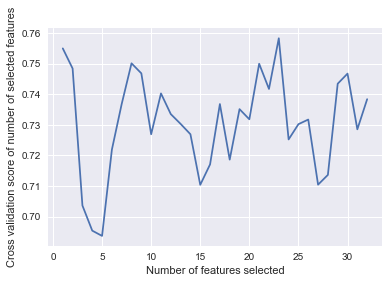

In [23]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 0 (0.079251)
2. feature 10 (0.078498)
3. feature 13 (0.067178)
4. feature 11 (0.060162)
5. feature 5 (0.059658)
6. feature 31 (0.059019)
7. feature 3 (0.056181)
8. feature 12 (0.044314)
9. feature 1 (0.036377)
10. feature 15 (0.031528)
11. feature 2 (0.031037)
12. feature 14 (0.029688)
13. feature 7 (0.026884)
14. feature 6 (0.025765)
15. feature 21 (0.025026)
16. feature 22 (0.024782)
17. feature 25 (0.024202)
18. feature 18 (0.022417)
19. feature 24 (0.022303)
20. feature 27 (0.021311)
21. feature 23 (0.021282)
22. feature 4 (0.019568)
23. feature 30 (0.019381)
24. feature 29 (0.019006)
25. feature 9 (0.017266)
26. feature 16 (0.015362)
27. feature 28 (0.014671)
28. feature 20 (0.014020)
29. feature 19 (0.012869)
30. feature 26 (0.012684)
31. feature 8 (0.005482)
32. feature 17 (0.002828)
Index(['Grade', 'Insurance', 'FH2', 'Income', 'Age', 'cancertype', 'Health',
       'Living', 'Marital', 'KPS', 'Live', 'FH3', 'Gender', 'Feel',
       'ImpairedMNA', 'Im

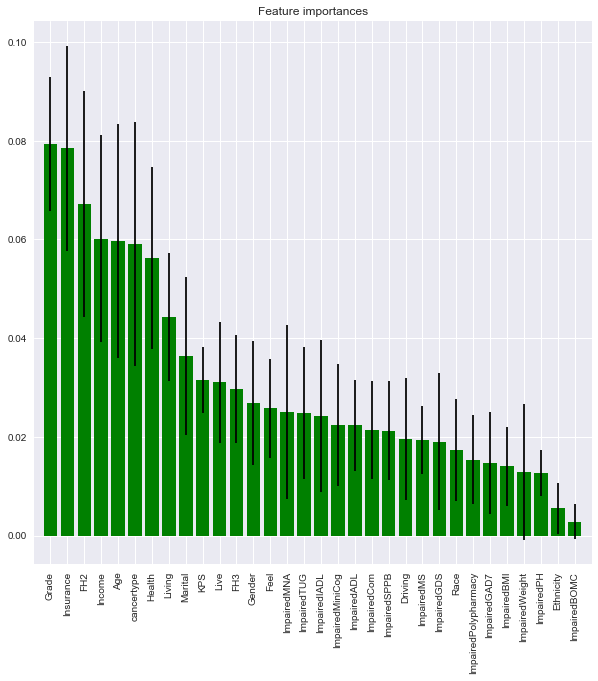

In [24]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(1, figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.show()
print(X_train.columns[indices])
feacturList = list(X_train.columns[indices])


In [25]:
# put Selected feacture for modeling
feactureSelected = feacturList[:]
feactureSelected =['Insurance', 'Income', 'cancertype', 'Health', 'Grade', 'Age', 'FH2',
       'Live', 'KPS', 'Living', 'Driving', 'Feel', 'Marital', 'ImpairedMNA',
       'ImpairedMiniCog', 'ImpairedIADL', 'ImpairedGDS', 'ImpairedCom']

# SEC.3 Model development

In [26]:
#LOAD PACKAGE

from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  


In [27]:
X1 = X[feactureSelected].copy()

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)  
X_train, y_train = InstanceHardnessThreshold().fit_sample(X_train, y_train)

In [28]:
# Logistic Regression

[[52 65]
 [14 20]]


             precision    recall  f1-score   support

          0       0.79      0.44      0.57       117
          1       0.24      0.59      0.34        34

avg / total       0.66      0.48      0.52       151

Accuracy: 47.68%


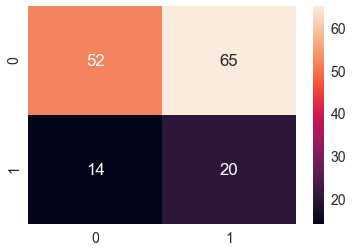

In [29]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
# plt.figure(figsize=(10, 5))

sns.heatmap(df_cm, annot=True,fmt="d")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[49 68]
 [10 24]]


             precision    recall  f1-score   support

          0       0.83      0.42      0.56       117
          1       0.26      0.71      0.38        34

avg / total       0.70      0.48      0.52       151



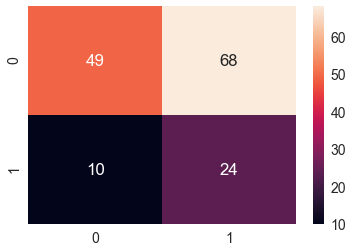

In [30]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred2)
print(cm)
print("\n")
print(classification_report(y_test,y_pred2))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt="d")

[[117   0]
 [ 34   0]]


             precision    recall  f1-score   support

          0       0.77      1.00      0.87       117
          1       0.00      0.00      0.00        34

avg / total       0.60      0.77      0.68       151



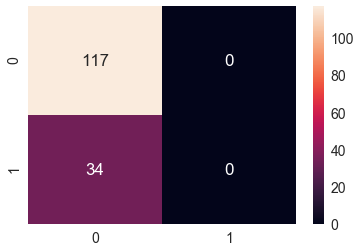

In [31]:
# MLP Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf = clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred2)
print(cm)
print("\n")
print(classification_report(y_test,y_pred2))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt="d")


# SEC.4 100 times testing

In [41]:
from sklearn.metrics import recall_score


# This cell will run the model for 100 times to get average recall accuracy ratio
logic_regression_recall = []
RandomForestClassifier_recall = []
MLPClassifier_recall = []

for i in range(100):
    
    X1 = X[feactureSelected].copy()
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)  
    X_train, y_train = InstanceHardnessThreshold().fit_sample(X_train, y_train)
    
    log = LogisticRegression()
    log.fit(X_train, y_train)
    y_pred1 = log.predict(X_test)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train,y_train)
    
    y_pred2 = clf.predict(X_test)
    
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
    mlp = mlp.fit(X_train, y_train)
    y_pred3 = mlp.predict(X_test)
    
    
    logic_regression_recall.append(recall_score(y_test, y_pred1))
    RandomForestClassifier_recall.append(recall_score(y_test, y_pred2))
    MLPClassifier_recall.append(recall_score(y_test,y_pred3))

In [42]:
# Data frame of each model's performace
df = pd.DataFrame({"logic":logic_regression_recall,"randomforest":RandomForestClassifier_recall,"mlp":MLPClassifier_recall})
df.describe()

,logic,mlp,randomforest
count,100.000000,100.000000,100.000000
mean,0.693209,0.629363,0.701757
std,0.130366,0.195219,0.147697
min,0.437500,0.000000,0.382353
25%,0.594595,0.560267,0.603659
50%,0.679699,0.666667,0.689327
75%,0.794872,0.755856,0.827934
max,0.942857,1.000000,0.974359


[(0.4, 1.0)]

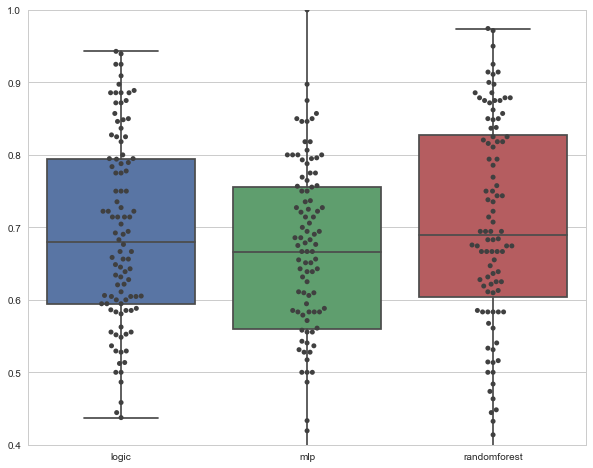

In [43]:
# Visulization of each model's performace
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df)
ax = sns.swarmplot( data=df, color=".25")
ax.set(ylim=(0.4, 1.0))


# SEC.05 Logistic Regression CV probability prediction model

In [38]:
from sklearn.linear_model import LogisticRegressionCV

[[80 34]
 [13 24]]


             precision    recall  f1-score   support

          0       0.83      0.68      0.74       114
          1       0.36      0.57      0.44        37

avg / total       0.71      0.65      0.67       151

[[0.83993719 0.16006281]
 [0.86173399 0.13826601]
 [0.884627   0.115373  ]
 [0.49113033 0.50886967]
 [0.55265441 0.44734559]
 [0.92019416 0.07980584]
 [0.75312495 0.24687505]
 [0.57639738 0.42360262]
 [0.61619025 0.38380975]
 [0.03697278 0.96302722]
 [0.62291354 0.37708646]
 [0.1997657  0.8002343 ]
 [0.56097865 0.43902135]
 [0.62238762 0.37761238]
 [0.5874353  0.4125647 ]
 [0.89660289 0.10339711]
 [0.37804644 0.62195356]
 [0.94831645 0.05168355]
 [0.93805516 0.06194484]
 [0.2919526  0.7080474 ]
 [0.89342125 0.10657875]
 [0.14694494 0.85305506]
 [0.13788181 0.86211819]
 [0.28636024 0.71363976]
 [0.13230715 0.86769285]
 [0.08149931 0.91850069]
 [0.79736366 0.20263634]
 [0.37641943 0.62358057]
 [0.66497845 0.33502155]
 [0.61682206 0.38317794]
 [0.4461335  0

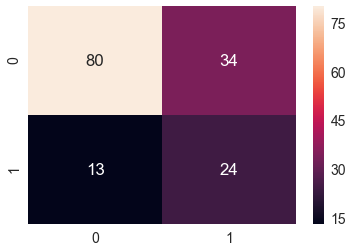

In [50]:
#Logistic Regression CV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred33 = clf.predict(X_test)
prob_list = clf.predict_proba(X_test)
cm = confusion_matrix(y_test,y_pred33)
print(cm)
print("\n")
print(classification_report(y_test,y_pred2))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt="d")
print(prob_list)